<a href="https://colab.research.google.com/github/SamarBaghdadi/CodingDojo_DS_V23/blob/new-main-branch/Mock_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mock Belt Exam
- Samar BAGHDADI
- 2nd September 2024

##1) Loading The Data

In [2]:
#making the appropriate imports
import pandas as pd

In [3]:
#Loading the data
fname='/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week03/Data/literacy_rates_updated - literacy_rates_updated.csv'

df=pd.read_csv(fname)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Region         3309 non-null   object
 1   Country        3313 non-null   object
 2   Year           3313 non-null   object
 3   Age            3313 non-null   object
 4   Gender         3313 non-null   object
 5   Literacy rate  3308 non-null   object
dtypes: object(6)
memory usage: 155.4+ KB


,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,<15,female,0.1761206
1,Central and Southern Asia,Afghanistan,2011,<15,male,0.454171
2,NaN,Afghanistan,2011,15-24,female,0.3211322
3,NaN,Afghanistan,2011,15-24,male,0.6187907
4,Central and Southern Asia,Afghanistan,2011,25-64,female,0.0841276


##2) The first step in this process is to use Python to clean the data to get it ready for analysis.
###a) Identify and address any duplicate values

In [4]:
#identifying duplicates
df.duplicated().sum()

10

In [5]:
#Including all the duplicates
duplicated_rows=df.duplicated(keep=False)


In [6]:
df[duplicated_rows].sort_values("Literacy rate")

,Region,Country,Year,Age,Gender,Literacy rate
38,Central and Southern Asia,Bangladesh,2013,65+,female,0.1530414
39,Central and Southern Asia,Bangladesh,2013,65+,female,0.1530414
2030,Northern Africa and Western Asia,Egypt,2013,65+,male,0.571875
2029,Northern Africa and Western Asia,Egypt,2013,65+,male,0.571875
17,Central and Southern Asia,Bangladesh,2011,15-24,female,0.7954449
18,Central and Southern Asia,Bangladesh,2011,15-24,female,0.7954449
346,Eastern and South-Eastern Asia,China,2010,<15,female,0.9271123
347,Eastern and South-Eastern Asia,China,2010,<15,female,0.9271123
1557,Latin America and the Caribbean,Mexico,2013,<15,female,0.9290394
1558,Latin America and the Caribbean,Mexico,2013,<15,female,0.9290394


In [7]:
#drop duplicates
df=df.drop_duplicates()
#verify there are no more duplicates
duplicated_rows=df.duplicated(keep=False)
duplicated_rows.sum()

0

###b) Ensure all columns match the data types listed in the data dictionary.

In [8]:
#get a list of the columns datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3303 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Region         3299 non-null   object
 1   Country        3303 non-null   object
 2   Year           3303 non-null   object
 3   Age            3303 non-null   object
 4   Gender         3303 non-null   object
 5   Literacy rate  3298 non-null   object
dtypes: object(6)
memory usage: 180.6+ KB


In [9]:
#Explore the year column
df['Year'].head()

,Year
0,2011
1,2011
2,2011
3,2011
4,2011


In [10]:
#Explore the data values in Year column
df['Year'].value_counts()

,count
Year,
2018,574
2011,454
2014,439
2010,400
2012,344
2015,316
2013,264
2016,264
2017,246


In [11]:
#Change 2011_ with 2011
df['Year']=df['Year'].replace('2011_',2011)
df['Year'].value_counts()

,count
Year,
2018,574
2011,454
2014,439
2010,400
2012,344
2015,316
2013,264
2016,264
2017,246


In [12]:
#convert the year data type to float
df['Year']=df['Year'].astype(int)
#verify the conversion is OK
df['Year'].dtype

dtype('int64')

In [13]:
#replacing % with nothing
df['Literacy rate']=df['Literacy rate'].str.replace('%','')
filter_percent=df['Literacy rate'].str.contains('%')
filter_percent.sum()


0

In [14]:
#Change the Literacy rate column type to Float
df['Literacy rate']=df['Literacy rate'].astype(float)
#Validating the change
df['Literacy rate'].dtype

dtype('float64')

In [15]:
#Final verification of the types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3303 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         3299 non-null   object 
 1   Country        3303 non-null   object 
 2   Year           3303 non-null   int64  
 3   Age            3303 non-null   object 
 4   Gender         3303 non-null   object 
 5   Literacy rate  3298 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 180.6+ KB


###3) Identify and address any inconsistencies in categorical values (example: cat, Cat, cats)

In [16]:
#define a list of categorical values in columns
cat_col=df.select_dtypes('object').columns
cat_col

Index(['Region', 'Country', 'Age', 'Gender'], dtype='object')

In [17]:
#Verifying the nature of the values inside the list of categorical columns
for cat in cat_col:
  print(cat)
  print('\n')
  print(df[cat].value_counts())
  print('\n')
  print('#############################')
  print('\n')

Region


Region
Latin America and the Caribbean     940
Sub-Saharan Africa                  770
Northern Africa and Western Asia    568
Europe and Northern America         336
Central and Southern Asia           307
Eastern and South-Eastern Asia      282
Oceania                              96
Name: count, dtype: int64


#############################


Country


Country
Mexico                 72
Uruguay                72
Brazil                 72
Palestine              64
Turkey                 64
                       ..
Trinidad and Tobago     8
Greece                  8
Estonia                 8
Hungary                 8
Antigua and Barbuda     4
Name: count, Length: 155, dtype: int64


#############################


Age


Age
<15      840
15-24    826
25-64    826
65+      811
Name: count, dtype: int64


#############################


Gender


Gender
female    1648
male      1648
F            4
M            3
Name: count, dtype: int64


#############################




In [18]:
#there are inconsistencies in the gender column,lets remidiate to that
df['Gender']=df['Gender'].replace('F','female')
df['Gender']=df['Gender'].replace('M','male')
#verify that the inconsistencies have been managed
df['Gender'].value_counts()

,count
Gender,
female,1652
male,1651


###d) Identify and address any missing values in this dataset. Fill in missing values with a placeholder appropriate for the data type.

In [19]:
#verify if there are missing values
df.isna().sum()

,0
Region,4
Country,0
Year,0
Age,0
Gender,0
Literacy rate,5


In [30]:
#investigate region missing values
missing_region=df['Region'].isna()

df[missing_region]

#Change the missing region of Afghanistan to Central and southern Asia
#df['Region']

,Region,Country,Year,Age,Gender,Literacy rate


In [31]:
afghanistan_country=df['Country']=="Afghanistan"
afghanistan_country
df[afghanistan_country]


,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,<15,female,0.176121
1,Central and Southern Asia,Afghanistan,2011,<15,male,0.454171
2,Central and Southern Asia,Afghanistan,2011,15-24,female,0.321132
3,Central and Southern Asia,Afghanistan,2011,15-24,male,0.618791
4,Central and Southern Asia,Afghanistan,2011,25-64,female,0.084128
5,Central and Southern Asia,Afghanistan,2011,25-64,male,0.377948
6,Central and Southern Asia,Afghanistan,2011,65+,female,0.196705
7,Central and Southern Asia,Afghanistan,2018,<15,female,0.298052
8,Central and Southern Asia,Afghanistan,2018,<15,male,0.554755
9,Central and Southern Asia,Afghanistan,2018,15-24,female,0.562547


In [32]:
missing_and_afgh=missing_region&afghanistan_country
missing_and_afgh.sum()


0

In [33]:
df.loc[missing_and_afgh,'Region']='Central and Southern Asia'
df[missing_region]

,Region,Country,Year,Age,Gender,Literacy rate


In [34]:
#Do the same thing with the region for country Uzbekistan
Uzbekistan_country=df['Country']=="Uzbekistan"
Uzbekistan_country
df[Uzbekistan_country]

,Region,Country,Year,Age,Gender,Literacy rate
282,Central and Southern Asia,Uzbekistan,2013,<15,female,0.999959
283,Central and Southern Asia,Uzbekistan,2013,<15,male,0.999938
284,Central and Southern Asia,Uzbekistan,2013,15-24,female,1.000000
285,Central and Southern Asia,Uzbekistan,2013,15-24,male,1.000000
286,Central and Southern Asia,Uzbekistan,2013,25-64,female,1.000000
287,Central and Southern Asia,Uzbekistan,2013,25-64,male,1.000000
288,Central and Southern Asia,Uzbekistan,2013,65+,female,0.999347
289,Central and Southern Asia,Uzbekistan,2013,65+,male,0.998772
290,Central and Southern Asia,Uzbekistan,2014,<15,female,0.999760
291,Central and Southern Asia,Uzbekistan,2014,<15,male,0.999852


In [35]:
missing_and_uzba=missing_region&Uzbekistan_country
missing_and_afgh.sum()

0

In [36]:
df.loc[missing_and_uzba,'Region']='Central and Southern Asia'
df[missing_region]

,Region,Country,Year,Age,Gender,Literacy rate


In [41]:
#Check the literacy rate NaN values
literacy_rate_null=df['Literacy rate'].isna()

In [42]:
#verify the lines that are NaN in Liretacy rate
df[literacy_rate_null]

,Region,Country,Year,Age,Gender,Literacy rate
498,Eastern and South-Eastern Asia,Singapore,2010,65+,male,NaN
608,Europe and Northern America,Albania,2012,15-24,female,NaN
753,Europe and Northern America,Portugal,2011,15-24,male,NaN
855,Europe and Northern America,Spain,2010,<15,female,NaN
884,Europe and Northern America,Spain,2013,25-64,male,NaN


In [43]:
#fill the NaN rates in Literacy rate with -1
df['Literacy rate']=df['Literacy rate'].fillna(-1)
literacy_rate_null=df['Literacy rate'].isna()
literacy_rate_null.sum()

0

In [45]:
#Check if there are still NaN values
df.isna().sum()

,0
Region,0
Country,0
Year,0
Age,0
Gender,0
Literacy rate,0


<Axes: >

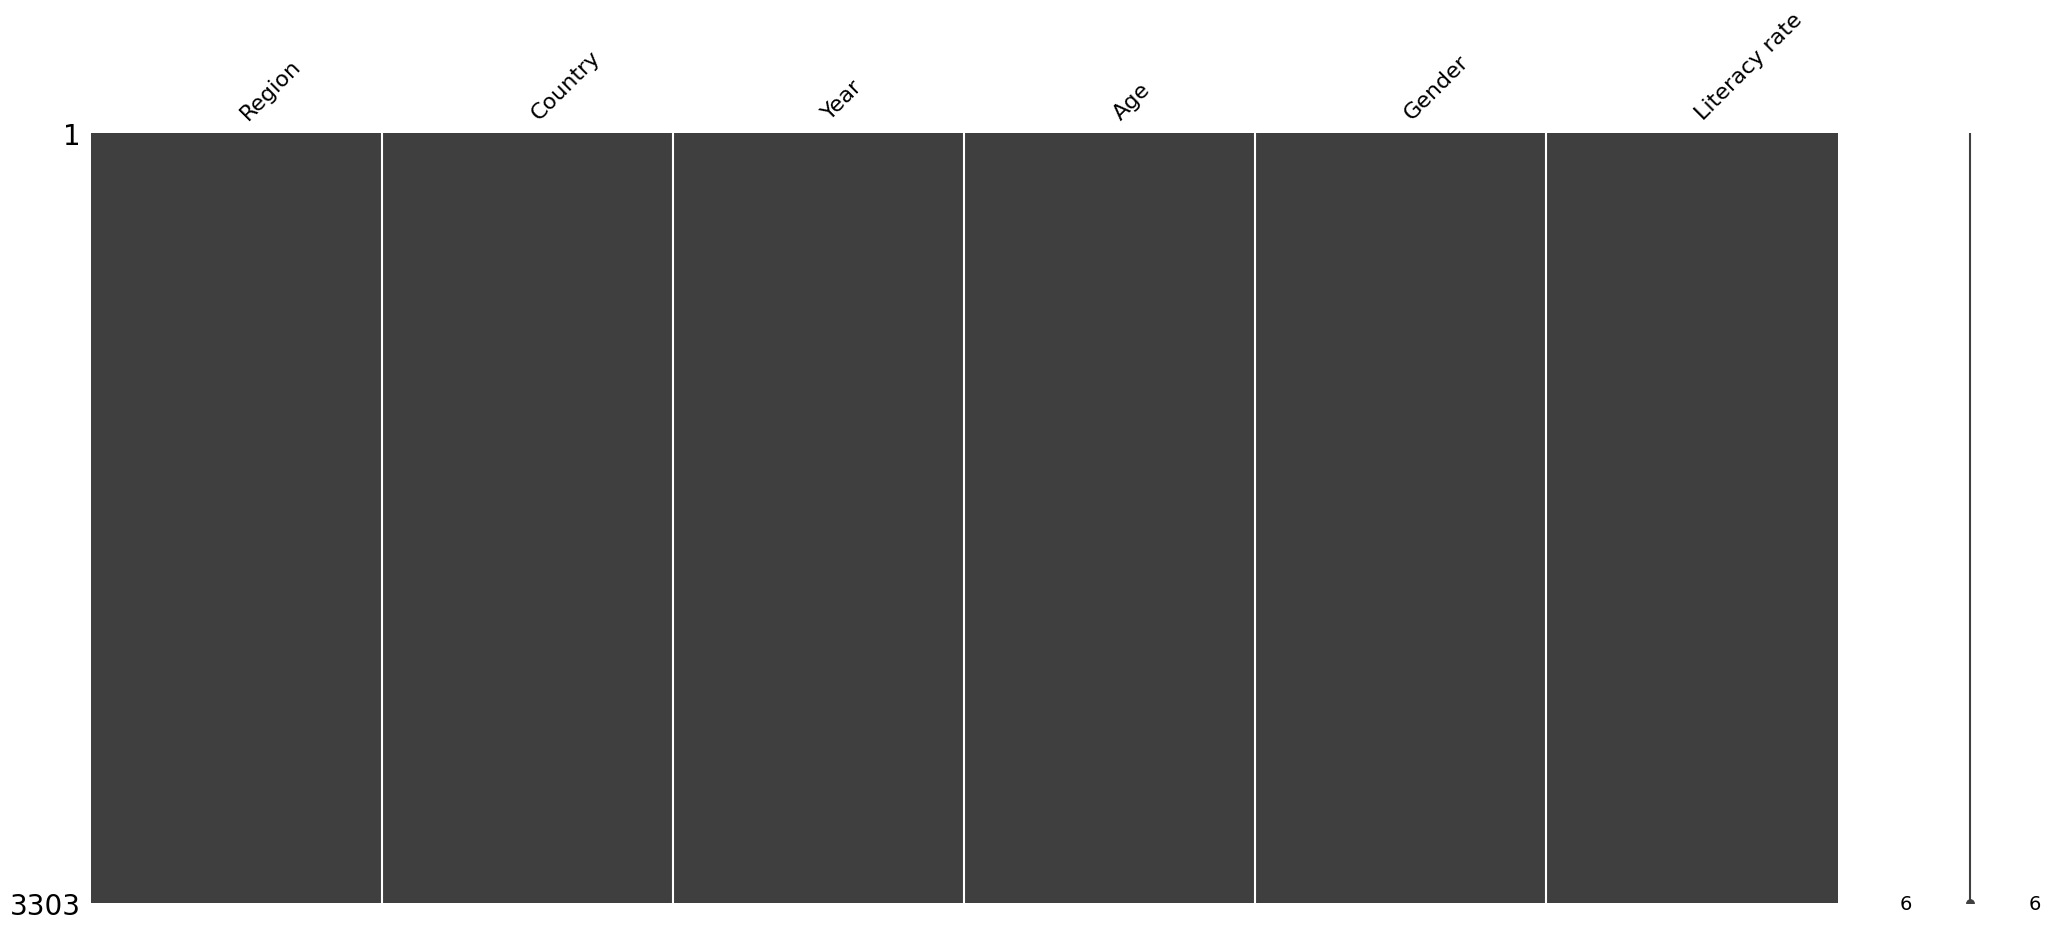

In [46]:
#Check the NaN values with missingno
import missingno as msno
msno.matrix(df)

###e) Identify and address any inappropriate or unusual data points (example: age cannot be 325)

In [48]:
#verify the value counts for all the columns
col_col=df.columns
col_col
for cat in col_col:
  print(cat)
  print('\n')
  print(df[cat].value_counts())
  print('\n')
  print('#############################')
  print('\n')

Region


Region
Latin America and the Caribbean     940
Sub-Saharan Africa                  770
Northern Africa and Western Asia    568
Europe and Northern America         336
Central and Southern Asia           311
Eastern and South-Eastern Asia      282
Oceania                              96
Name: count, dtype: int64


#############################


Country


Country
Mexico                 72
Uruguay                72
Brazil                 72
Palestine              64
Turkey                 64
                       ..
Trinidad and Tobago     8
Greece                  8
Estonia                 8
Hungary                 8
Antigua and Barbuda     4
Name: count, Length: 155, dtype: int64


#############################


Year


Year
2018    574
2011    455
2014    439
2010    400
2012    344
2015    316
2013    264
2016    264
2017    246
3014      1
Name: count, dtype: int64


#############################


Age


Age
<15      840
15-24    826
25-64    826
65+      811
Name: count, 

In [52]:
#the col Year has a value 3014 which is unusual, let's change it to -1
#First we need to isolate the row that contains the year 3014
unusual_year=df['Year']==3014
#Now let's replace this year to a null value
import numpy as np
df.loc[unusual_year,'Year']=np.nan
df['Year'].describe()

,Year
count,3302.000000
mean,2013.988189
std,2.746733
min,2010.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2018.000000


In [ ]:
#Let's recheck for unusual data points
